In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib # visualization
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
import cv2

In [ ]:
# Images
image_1 = "/content/drive/MyDrive/DevisionX_AIBootcamp/image-1.png"
image_2 = "/content/drive/MyDrive/DevisionX_AIBootcamp/image-2.png"
image_3 = "/content/drive/MyDrive/DevisionX_AIBootcamp/image-3.jpeg"

# **Histogram Equalization**

In [ ]:
# Histogram Equalization

def hist_equalization(image):
  image = cv2.imread(image) #, cv.IMREAD_GRAYSCALE)
  # Convert image to grayscale
  if image.shape[2] > 1:
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  image = np.asarray(image)
  # Creating Histogram
  histogram = np.zeros(256)
  for i in range(1, image.shape[0]):
    for j in range(1, image.shape[1]):
      value = image[i, j]
      histogram[value] += 1
  num_pixels = image.shape[0] * image.shape[1] # Total Num of Pixels in image
  cdf = 0 # Intializing Cummulative Sum
  equalized_image = np.zeros_like(image)
  for j in range(len(histogram)):
    pdf = histogram[j] /num_pixels # Normalization through PDF
    cdf += pdf
    equalized_image[image == j] = np.floor(255 * cdf).astype(np.uint8) # Converting pixel to its new value by selecting the pixels with the said intensity

  return equalized_image



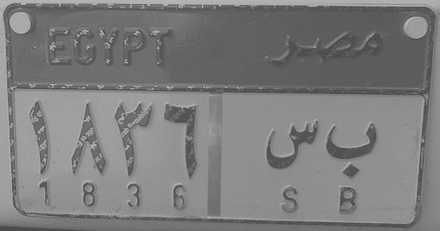

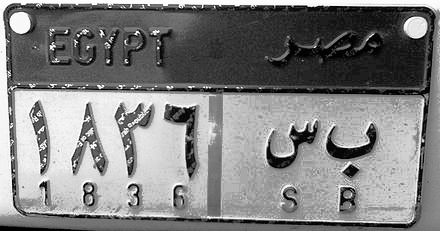

In [ ]:
# For Image 1
histogram_1 = hist_equalization(image_1)
cv2_imshow(cv2.imread(image_1, cv2.IMREAD_GRAYSCALE))
cv2_imshow(histogram_1)

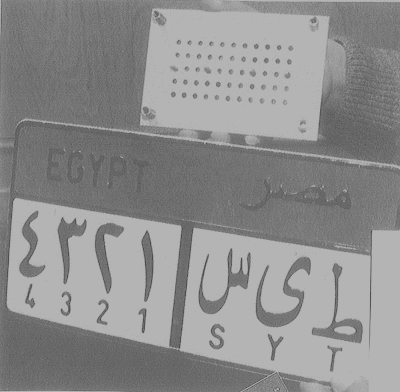

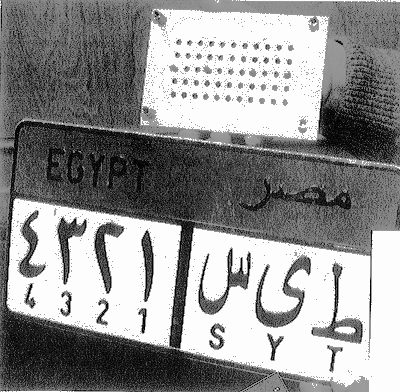

In [ ]:
# For Image 2

histogram_2 = hist_equalization(image_2)
cv2_imshow(cv2.imread(image_2, cv2.IMREAD_GRAYSCALE))
cv2_imshow(histogram_2)

# **Thresholding**

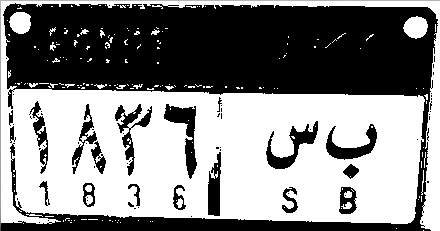

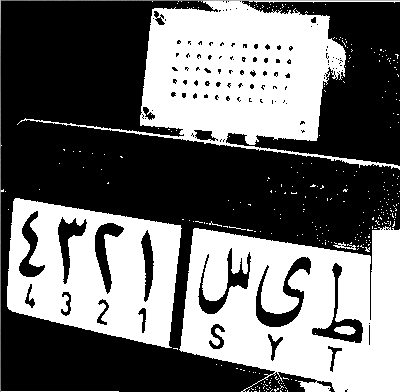

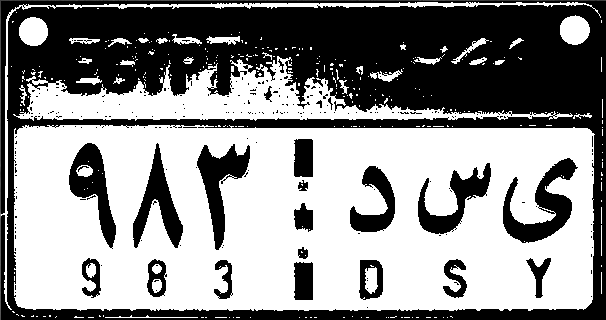

In [ ]:
import cv2
import numpy as np

def basic_thresholding(path_to_img):
  image = cv2.imread(path_to_img)
  image = np.asarray(image)
  img_height, img_width, img_channels = image.shape
  if img_channels == 3:
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
  threshold = np.mean(np.mean(image))
  for i in range(1, img_height):
    for j in range(1, img_width):
      if image[i, j] >= threshold:
        image[i, j] = 255
      else:
        image[i, j] = 0

  return image

result = basic_thresholding(image_1)
result2 = basic_thresholding(image_2)
result3 = basic_thresholding(image)
cv2_imshow(result)
cv2_imshow(result2)
cv2_imshow(result3)


# **Morphology**

Original Image


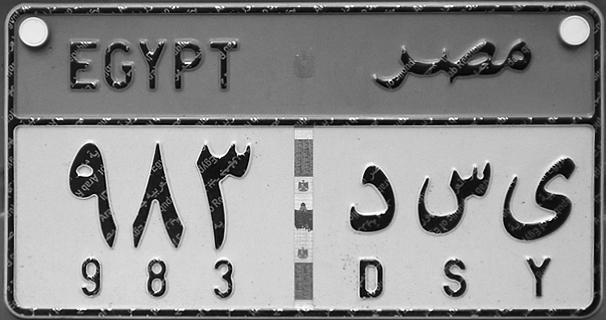

After Erosion, 5x5 Filter


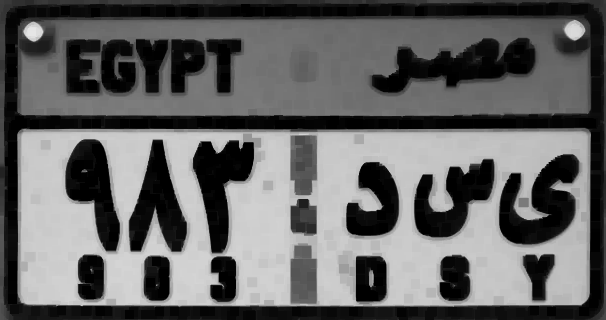

After Erosion, 3x3 Filter


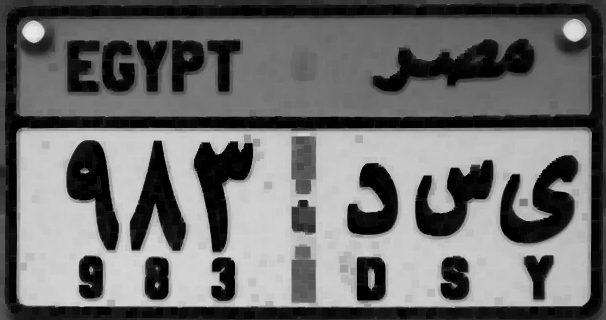

After Morphological Gradient, 5x5 Filter


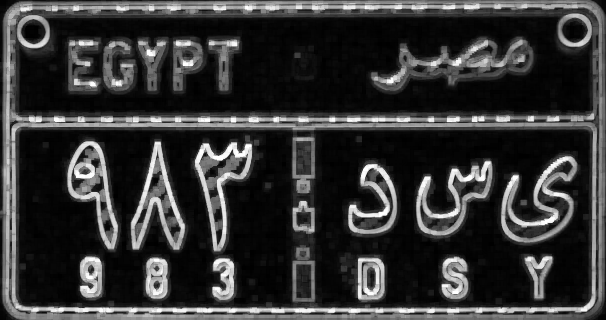

After Morphological Gradient, 3x3 Filter


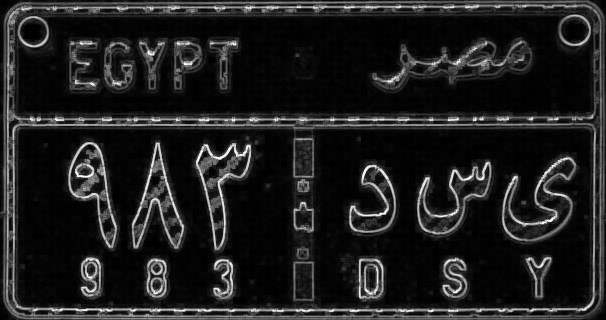

In [ ]:
# Morphology
original_image = cv2.imread(image_3, cv2.IMREAD_GRAYSCALE)
print('Original Image')
cv2_imshow(original_image)

kernel_1 = np.ones((5,5), np.uint8)
kernel_2 = np.ones((3,3), np.uint8)
eroded_image_1 = cv2.erode(original_image, kernel_1, iterations = 2)
print('After Erosion, 5x5 Filter')
cv2_imshow(eroded_image_1)

eroded_image_2 = cv2.erode(original_image, kernel_2, iterations = 3)
print('After Erosion, 3x3 Filter')
cv2_imshow(eroded_image_2)

test_morph_grad_1 = cv2.morphologyEx(original_image, cv2.MORPH_GRADIENT, kernel_1)
print('After Morphological Gradient, 5x5 Filter')
cv2_imshow(test_morph_grad_1)

test_morph_grad_2 = cv2.morphologyEx(original_image, cv2.MORPH_GRADIENT, kernel_2)
print('After Morphological Gradient, 3x3 Filter')
cv2_imshow(test_morph_grad_2)

# **Gaussian Blur**

In [ ]:
# Gaussian Blur
def convolution(image, kernel):
  if len(image.shape) == 3:
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  img_h, img_w = image.shape
  kernel_h, kernel_w = kernel.shape
  h = kernel_h // 2
  w = kernel_w // 2
  image_padded = np.pad(image, ((h, h), (w, w)), mode='constant')

  conv_image = np.zeros_like(image)

  for i in range(h, img_h + h):
    for j in range(w, img_w + w):
      conv_image[i- h][j-w] = sum(image_padded[i-h:i-h+kernel_h, j-w:j-w+kernel_w].flatten() * kernel.flatten())

  return conv_image

def gaussian_blur(image_path, sigma):
  image = cv2.imread(image_path)
  image = np.asarray(image)
  kernel_size = 2 * int(2 * sigma) + 1
  gaussian_filter = np.zeros((kernel_size, kernel_size), np.float32)

  h = kernel_size // 2
  w = kernel_size // 2

  for x in range(-h, h+1):
      for y in range(-w, w+1):
          x1 = 2*np.pi*(sigma**2)
          x2 = np.exp(-(x**2 + y**2)/(2* sigma**2))
          gaussian_filter[x+h, y+w] = (1/x1)*x2

  im_filtered = np.zeros_like(image, dtype=np.float32)
  for c in range(3):
      im_filtered[:, :, c] = convolution(image[:, :, c], gaussian_filter)
  return im_filtered

Original Image


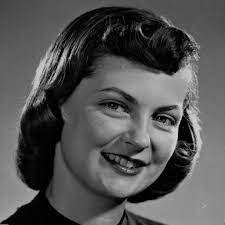

Gaussian Blur with sigma value of 1.5


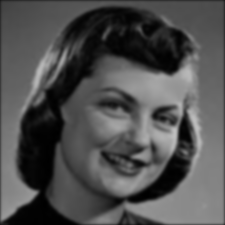

Gaussian Blur with sigma value of 4.5


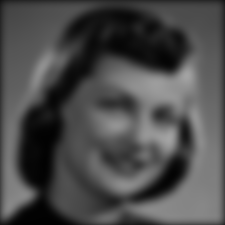

In [ ]:
test_image_1 = "/content/drive/MyDrive/DevisionX_AIBootcamp/download.jpeg"
print('Original Image')
cv2_imshow(cv2.imread(test_image_1))

sigma_1 = 1.5
result_1 = gaussian_blur(test_image_1, sigma_1)
print(f"Gaussian Blur with sigma value of {sigma_1}")
cv2_imshow(result_1)

sigma_2 = 4.5
result_2 = gaussian_blur(test_image_1, sigma_2)
print(f"Gaussian Blur with sigma value of {sigma_2}")
cv2_imshow(result_2)

# **Canny Edge Detection**

In [ ]:
# Canny Edge Detection
def canny_edge_detection(image_path):
  image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
  image = np.asarray(image).astype('float32')
  sobel_filter_x = np.array([[-1, 0, 1],
                             [-2, 0, 2],
                             [-1, 0, 1]])

  sobel_filter_y = np.array([[1, 2, 1],
                             [0, 0, 0],
                             [-1, -2, -1]])

  image = gaussian_blur(image_path, sigma = 1.4)

  gradient_x = convolution(image, sobel_filter_x)
  gradient_y = convolution(image, sobel_filter_y)

  gradient_magnitude = np.sqrt((gradient_x**2)+ (gradient_y**2))

  return gradient_magnitude


Original Image


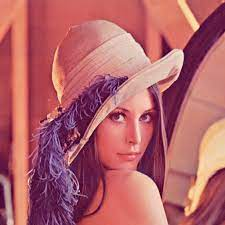

After Edge Detection


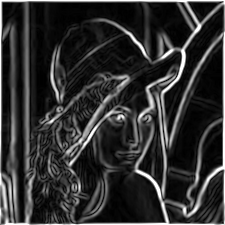

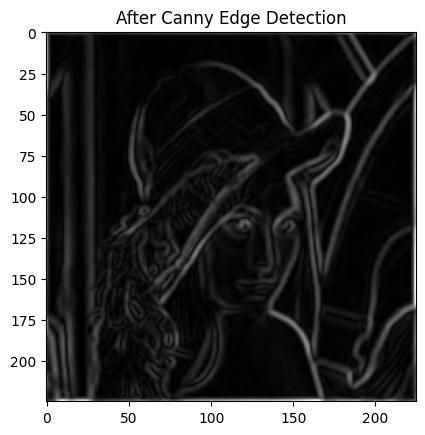

In [ ]:
test_image_2 = "/content/drive/MyDrive/DevisionX_AIBootcamp/lena.jpeg"
print('Original Image')
cv2_imshow(cv2.imread(test_image_2))
result = canny_edge_detection(test_image_2)
print('After Edge Detection')
cv2_imshow(result)
plt.imshow(result, cmap='gray')
plt.title('After Canny Edge Detection')
plt.show()